In [78]:
import pandas as pd
df=pd.read_csv('/content/NetflixOriginals.csv',encoding='unicode_escape')

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
df.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [ ]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [81]:
print(df.isnull().sum())

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [83]:
mean_rating = df['IMDB Score'].mean()
median_rating = df['IMDB Score'].median()
max_rating = df['IMDB Score'].max()
min_rating = df['IMDB Score'].min()

In [84]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [85]:
mean_rating = df['IMDB Score'].mean()
median_rating = df['IMDB Score'].median()
max_rating = df['IMDB Score'].max()
min_rating = df['IMDB Score'].min()

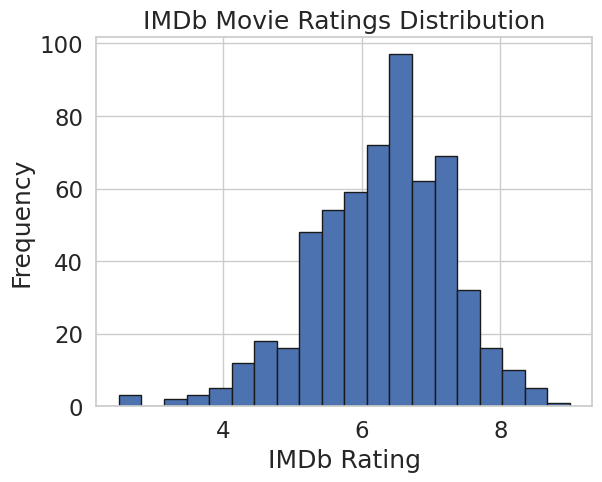

In [86]:
plt.hist(df['IMDB Score'], bins=20, edgecolor='k')
plt.title('IMDb Movie Ratings Distribution')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

In [87]:
top_rated_movies = df.nlargest(10, 'IMDB Score')


In [88]:
average_rating_by_genre = df.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False)

In [89]:

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Max Rating: {max_rating}")
print(f"Min Rating: {min_rating}")

Mean Rating: 6.2717465753424655
Median Rating: 6.35
Max Rating: 9.0
Min Rating: 2.5


In [90]:

print("\nTop-Rated Movies:")
print(top_rated_movies)

print("\nGenres with the Highest Average Ratings:")
print(average_rating_by_genre)


Top-Rated Movies:
                                           Title         Genre  \
583     David Attenborough: A Life on Our Planet   Documentary   
582    Emicida: AmarElo - It's All For Yesterday   Documentary   
581                      Springsteen on Broadway  One-man show   
578   Ben Platt: Live from Radio City Music Hall  Concert Film   
579        Taylor Swift: Reputation Stadium Tour  Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom   Documentary   
576                      Cuba and the Cameraman    Documentary   
577                       Dancing with the Birds   Documentary   
571                                         13th   Documentary   
572            Disclosure: Trans Lives on Screen   Documentary   

              Premiere  Runtime  IMDB Score                  Language  
583    October 4, 2020       83         9.0                   English  
582   December 8, 2020       89         8.6                Portuguese  
581  December 16, 2018      153       

<ipython-input-130-eaee3b4d1aa7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


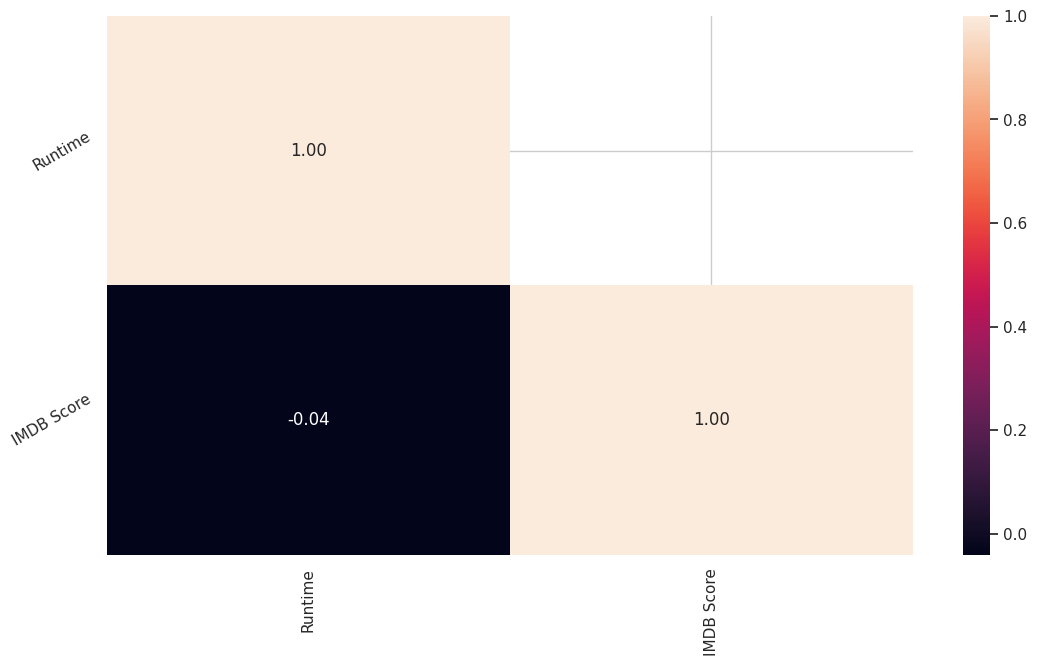

In [130]:

# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

<ipython-input-132-ce50156fbef5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


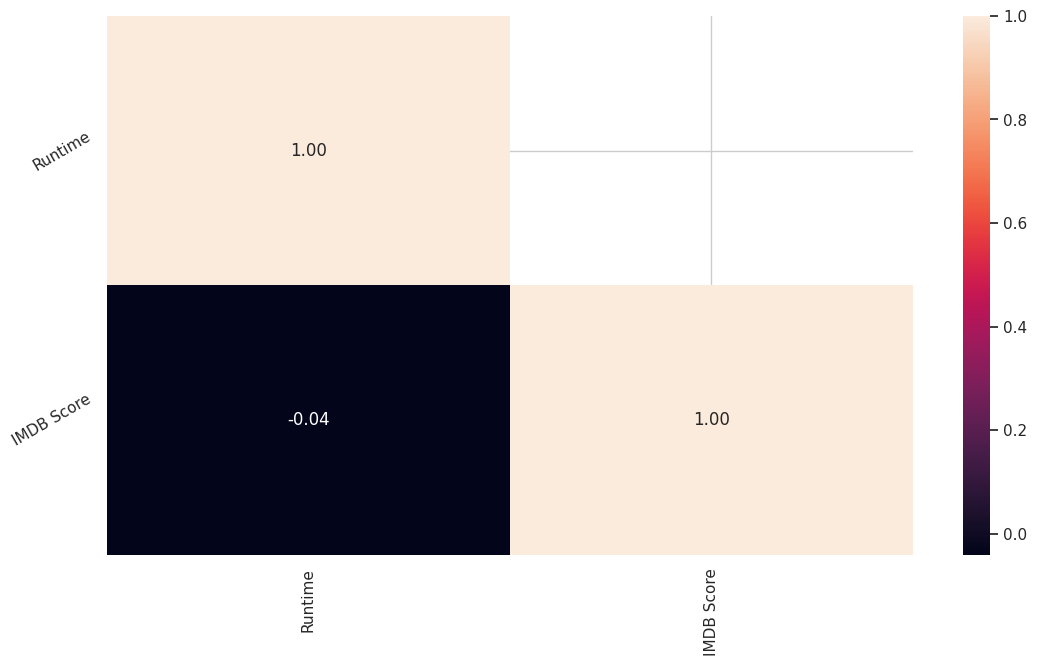

In [91]:
df_DarkForces= df[df["Title"] == 'Dark Forces'].copy()
df_DarkForces


,Title,Genre,Premiere,Runtime,IMDB Score,Language
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish


In [92]:
sns.set(font_scale=1.5, style="whitegrid")


In [93]:
df_DarkForces.drop(df_DarkForces.index[df_DarkForces['IMDB Score'] == 0], inplace = True)

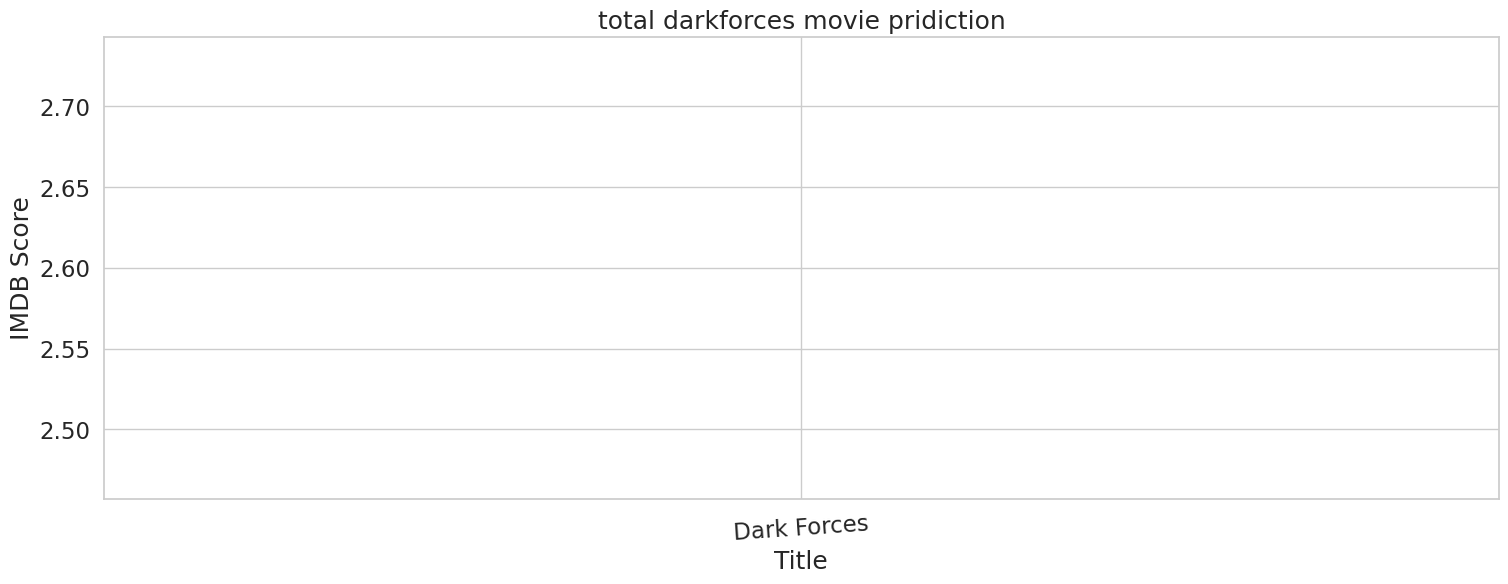

In [94]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_DarkForces, x="Title", y="IMDB Score")
plt.title("total darkforces movie pridiction")
plt.xticks(rotation=4)
plt.show()

In [95]:
movie = df.groupby('Title').max().sort_values('IMDB Score', ascending=False)
movie= movie.iloc[:10]
movie


,Genre,Premiere,Runtime,IMDB Score,Language
Title,,,,,
David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish


from matplotlib import pyplot as plt
_df_79['Runtime'].plot(kind='hist', bins=20, title='Runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_80['IMDB Score'].plot(kind='hist', bins=20, title='IMDB Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_81.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_82.groupby('Language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_83.plot(kind='scatter', x='Runtime', y='IMDB Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Runtime']
  ys = series['IMDB Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_84.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('IMDB Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Runtime']
  ys = series['IMDB Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_85.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Language')):
  _plot_series(series, series_name, i)
  fig.legend(title='Language', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('IMDB Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Runtime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Runtime'}, axis=1)
              .sort_values('Runtime', ascending=True))
  xs = counted['Runtime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_86.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Runtime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Runtime'}, axis=1)
              .sort_values('Runtime', ascending=True))
  xs = counted['Runtime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_87.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Language')):
  _plot_series(series, series_name, i)
  fig.legend(title='Language', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_88['Runtime'].plot(kind='line', figsize=(8, 4), title='Runtime')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_89['IMDB Score'].plot(kind='line', figsize=(8, 4), title='IMDB Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Language'].value_counts()
    for x_label, grp in _df_90.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Language')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_91['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_91, x='Runtime', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_92['Language'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_92, x='Runtime', y='Language', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_93['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_93, x='IMDB Score', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_94['Language'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_94, x='IMDB Score', y='Language', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [96]:
movie = movie.sort_values('IMDB Score', ascending=False)
movie

,Genre,Premiere,Runtime,IMDB Score,Language
Title,,,,,
David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish


from matplotlib import pyplot as plt
_df_95['Runtime'].plot(kind='hist', bins=20, title='Runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_96['IMDB Score'].plot(kind='hist', bins=20, title='IMDB Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_97.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_98.groupby('Language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_99.plot(kind='scatter', x='Runtime', y='IMDB Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Runtime']
  ys = series['IMDB Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_100.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('IMDB Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Runtime']
  ys = series['IMDB Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_101.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Language')):
  _plot_series(series, series_name, i)
  fig.legend(title='Language', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('IMDB Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Runtime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Runtime'}, axis=1)
              .sort_values('Runtime', ascending=True))
  xs = counted['Runtime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_102.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Runtime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Runtime'}, axis=1)
              .sort_values('Runtime', ascending=True))
  xs = counted['Runtime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_103.sort_values('Runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Language')):
  _plot_series(series, series_name, i)
  fig.legend(title='Language', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Runtime')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_104['Runtime'].plot(kind='line', figsize=(8, 4), title='Runtime')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_105['IMDB Score'].plot(kind='line', figsize=(8, 4), title='IMDB Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Language'].value_counts()
    for x_label, grp in _df_106.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Language')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_107['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_107, x='Runtime', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_108['Language'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_108, x='Runtime', y='Language', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_109['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_109, x='IMDB Score', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_110['Language'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_110, x='IMDB Score', y='Language', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

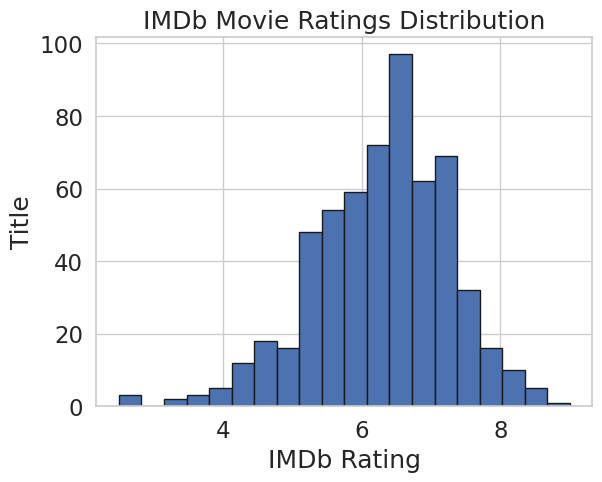

In [97]:
plt.hist(df['IMDB Score'], bins=20, edgecolor='k')
plt.title('IMDb Movie Ratings Distribution')
plt.xlabel('IMDb Rating')
plt.ylabel('Title')
plt.show()

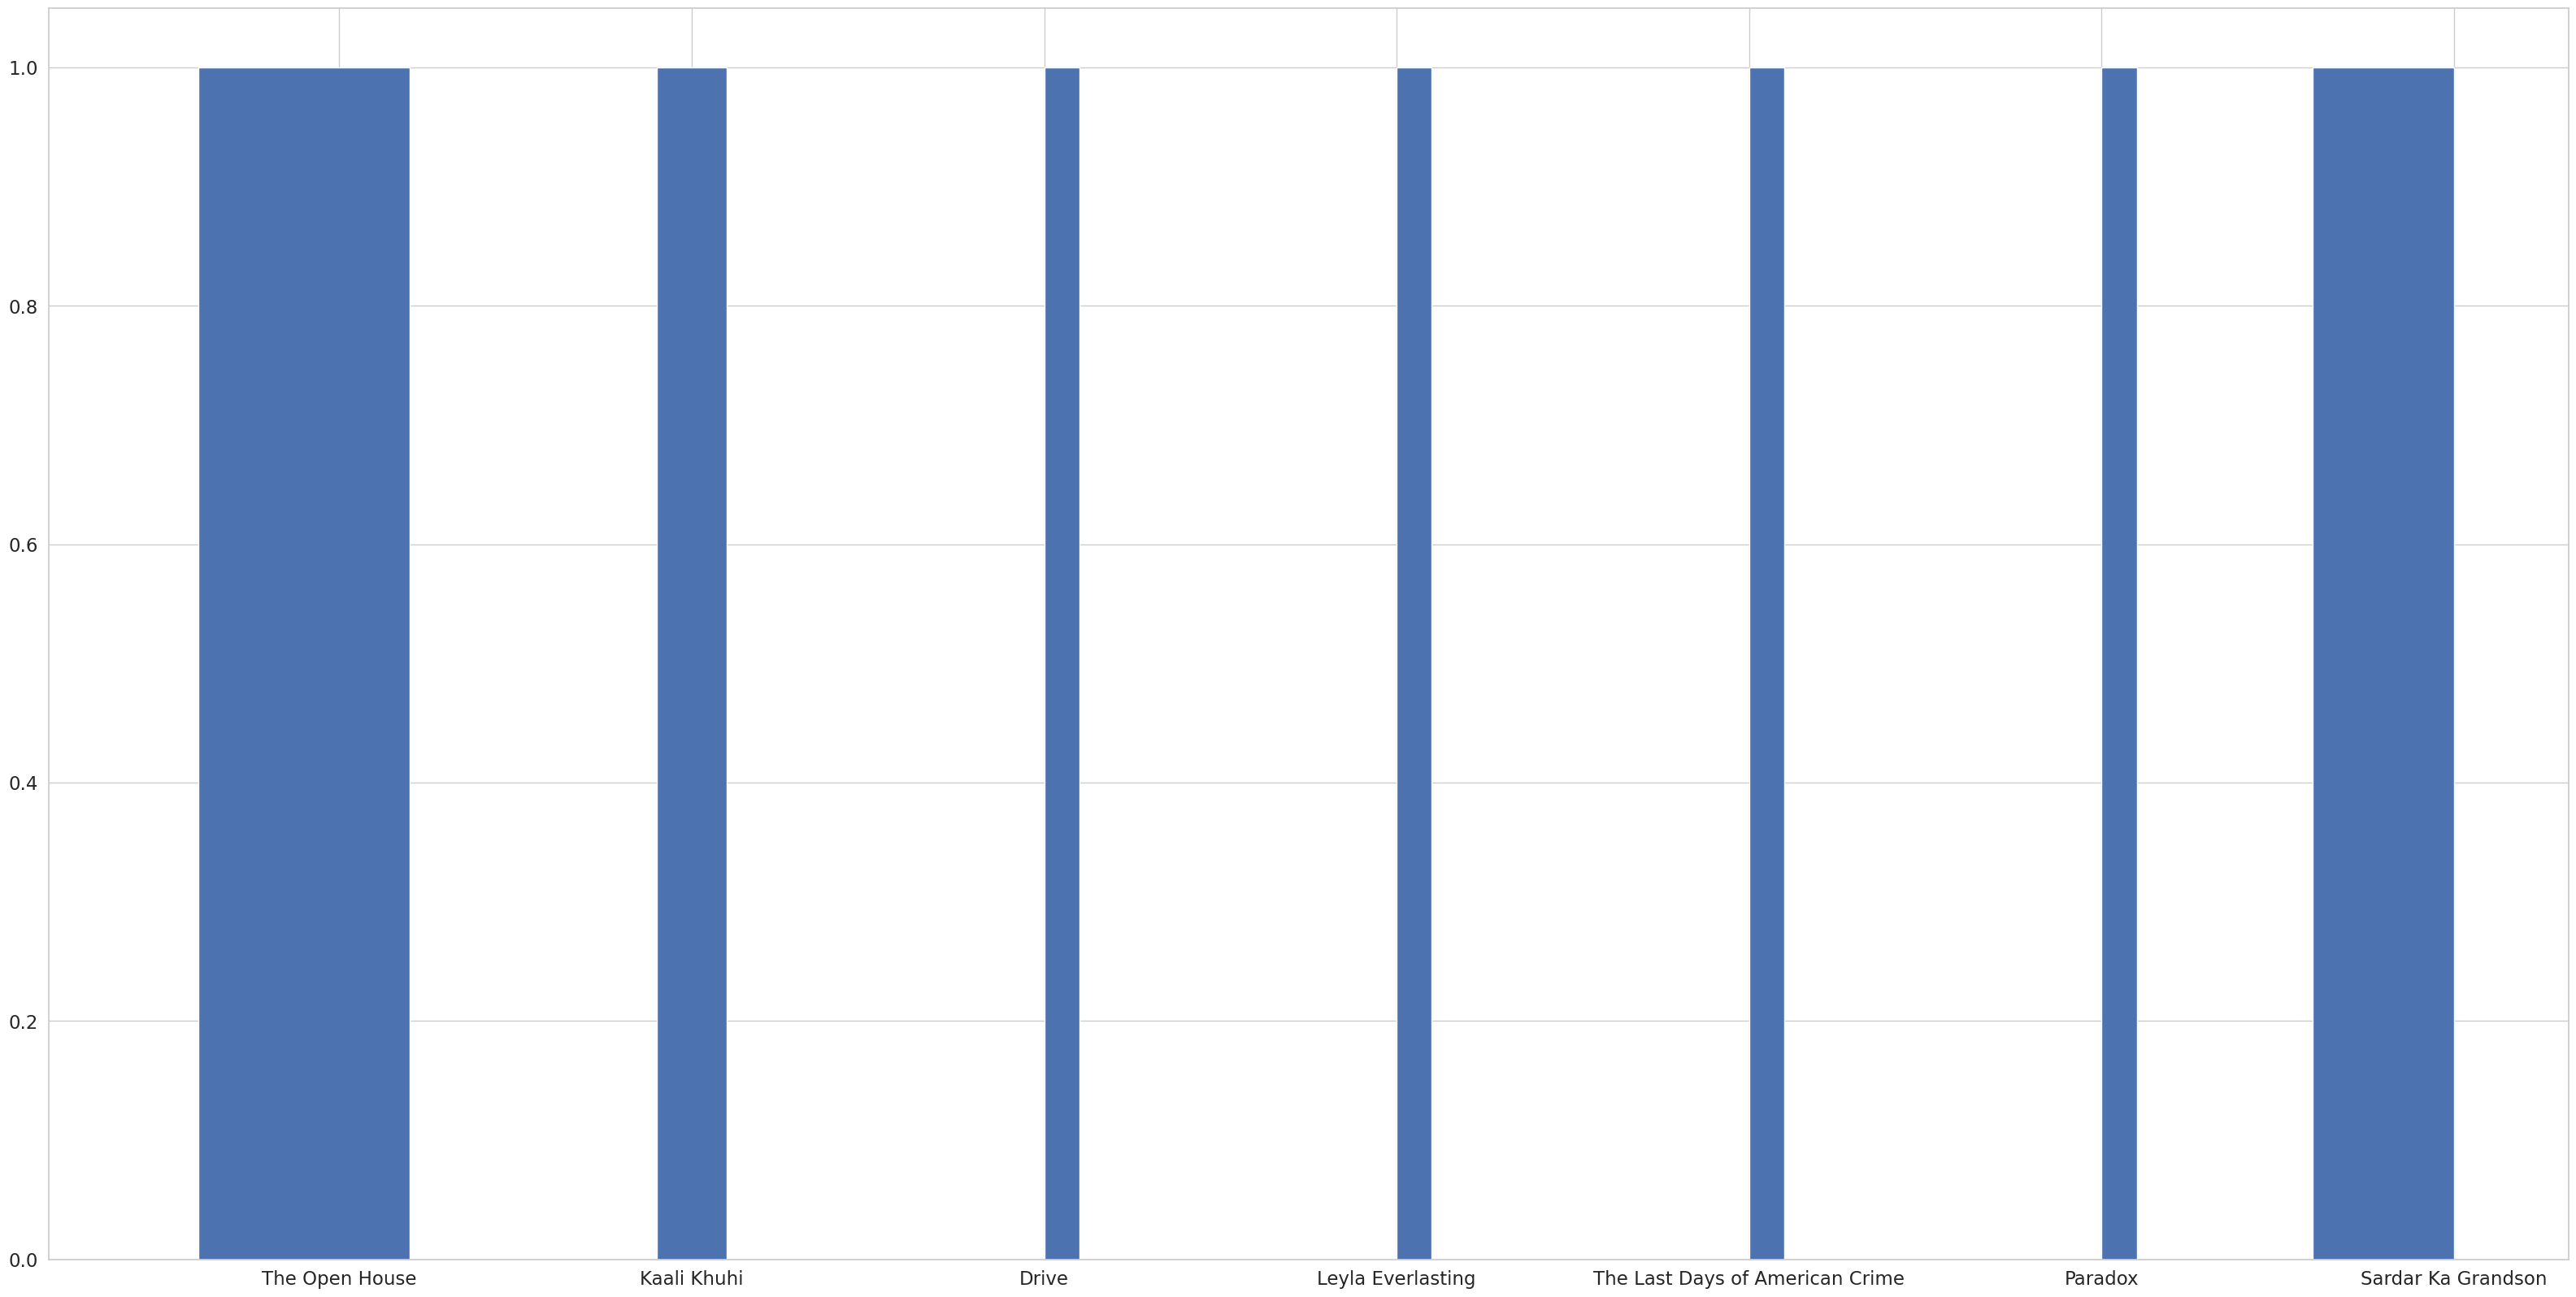

In [124]:
movie = df.groupby('Title').max().sort_values('IMDB Score', ascending=False)
movie= movie.iloc[:10]
movie
x=df["Title"]
y=df["IMDB Score"]
plt.figure(figsize=(40,20))
plt.hist(x,y)
plt.show()

# New Section

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [116]:
x = df[["IMDB Score"]]
y = df["Runtime"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [117]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

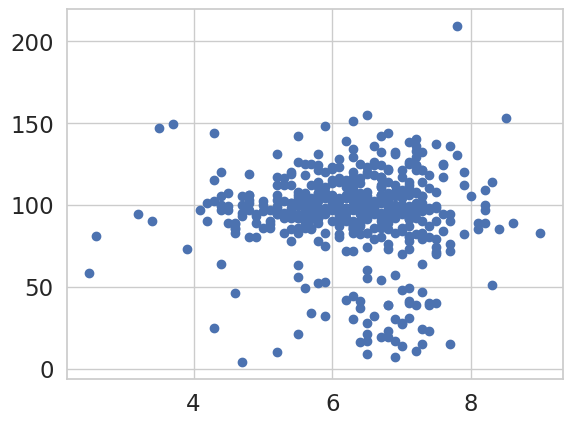

In [123]:
plt.scatter(xtrain, ytrain)